In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

C:\Users\Gamer PC\AppData\Local\Temp\ipykernel_19492\2338556962.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
class_names = Base.classes.keys()
print(class_names)

['measurement', 'station']


In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)

2017-08-23


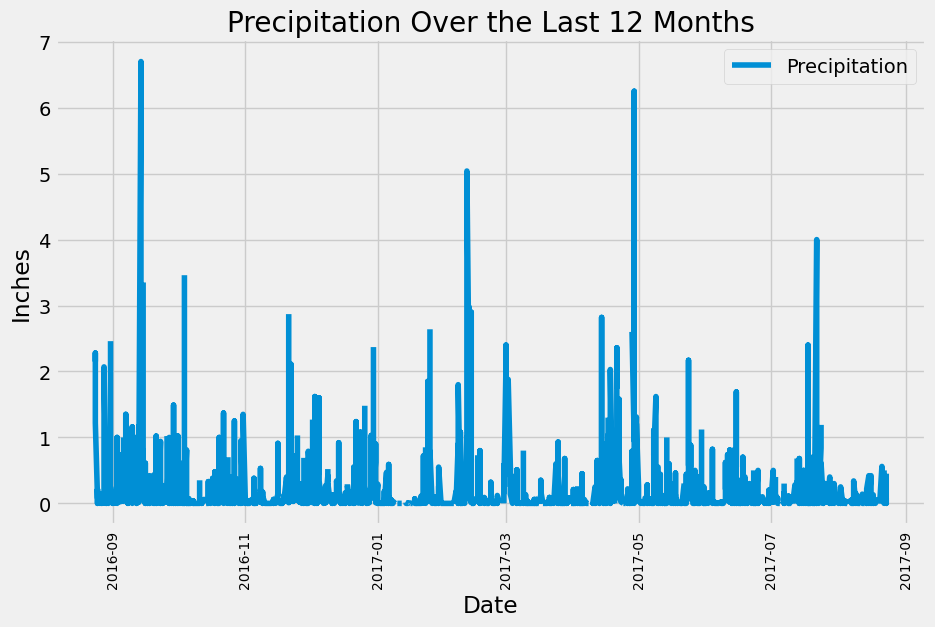

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=["Date", "Precipitation"])

# Sort the dataframe by date
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values("Date" , inplace = True)
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (10, 6))
plt.plot(df['Date'], df['Precipitation'], label = 'Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('Precipitation Over the Last 12 Months')
plt.legend()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['Precipitation'].describe()
summary_statistics_df = summary_statistics.to_frame(name='Precipitation')

summary_statistics_df


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
print(f"There are {total_stations} unique stations")

There are 9 unique stations


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
df = pd.read_sql(session.query(Measurement.station, Measurement.id).statement, session.bind)

most_active_stations = df['station'].value_counts().reset_index()
most_active_stations.columns = ['Station', 'Count']
print(most_active_stations)

       Station  Count
0  USC00519281   2772
1  USC00519397   2724
2  USC00513117   2709
3  USC00519523   2669
4  USC00516128   2612
5  USC00514830   2202
6  USC00511918   1979
7  USC00517948   1372
8  USC00518838    511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
df = pd.read_sql(session.query(Measurement.tobs).filter(Measurement.station == most_active_station).statement, session.bind)

low_temp = df['tobs'].min()
high_temp = df['tobs'].max()
avg_temp = df['tobs'].mean()


print(f"Lowest Temperature: {low_temp}")
print(f"Highest Temperature: {high_temp}")
print(f"Average Temperature: {avg_temp}")

NameError: name 'most_active_station' is not defined

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Extract temperatures from results
temperatures = [temp[0] for temp in results]

# Plotting using Matplotlib
plt.hist(temperatures, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()